# Clustering - Mini-Project 3

***Edit this cell with your name(s), tutorial number(s) and ID(s)***

---

Name:

ID:

Tutorial:

---

Name:

ID:

Tutorial:

---

Name:

ID:

Tutorial:

---


## Dataset Description

The dataset file contains almost ~3000 different music genres aggregated from more than 170.000 songs collected from Spotify Web API.

Primary:

- genre (Music genre)

Numerical:

- acousticness (Ranges from 0 to 1)
- danceability (Ranges from 0 to 1)
- energy (Ranges from 0 to 1)
- duration_ms (Integer typically ranging from 200k to 300k)
- instrumentalness (Ranges from 0 to 1)
- valence (Ranges from 0 to 1)
- popularity (Ranges from 0 to 100)
- tempo (Float typically ranging from 50 to 150)
- liveness (Ranges from 0 to 1)
- loudness (Float typically ranging from -60 to 0 in decibels (dB))
- speechiness (Ranges from 0 to 1)
- year (Ranges from 1921 to 2020)


Categorical:

- key (All keys on octave encoded as values ranging from 0 to 11, starting on C as 0, C# as 1 and so on…)


**Recommended Reading for Data Understanding**: Spotify's documentation of audio features: https://developer.spotify.com/documentation/web-api/reference/tracks/get-audio-features/

**Acknowledgment**: This dataset was created and published by Yamaç Eren Ay on Kaggle.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('fivethirtyeight')
sns.set_style('whitegrid')

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/GUC-DM/W2022/main/data/music_genres.csv')
df.head(5)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2973 entries, 0 to 2972
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   mode              2973 non-null   int64  
 1   genres            2973 non-null   object 
 2   acousticness      2973 non-null   float64
 3   danceability      2973 non-null   float64
 4   duration_ms       2973 non-null   float64
 5   energy            2973 non-null   float64
 6   instrumentalness  2973 non-null   float64
 7   liveness          2973 non-null   float64
 8   loudness          2973 non-null   float64
 9   speechiness       2973 non-null   float64
 10  tempo             2973 non-null   float64
 11  valence           2973 non-null   float64
 12  popularity        2973 non-null   float64
 13  key               2973 non-null   int64  
dtypes: float64(11), int64(2), object(1)
memory usage: 325.3+ KB


# Visualization

What are the 5 most popular music genres?


---


Basshall, Turkish EDM, South african house, Trap venezolano, Alberta hip hop


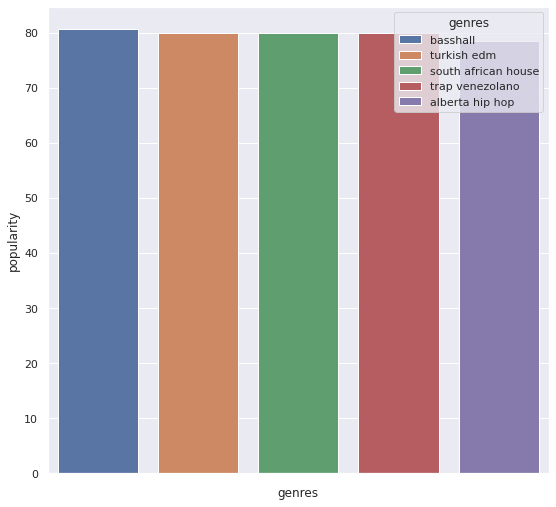

In [5]:
sns.set(rc={'figure.figsize':(8,8)})
g = df.groupby('genres', as_index=False)['popularity'].sum().sort_values(by='popularity', ascending=False).head(5)
sns.barplot(data=g, x='genres', y='popularity', hue='genres', dodge=False).set(xticklabels=[]);

2. What factors affect the Popularity of the song ? (Mention the biggest factors, with interpretation)

---
Acousticness, Energy, Loudness


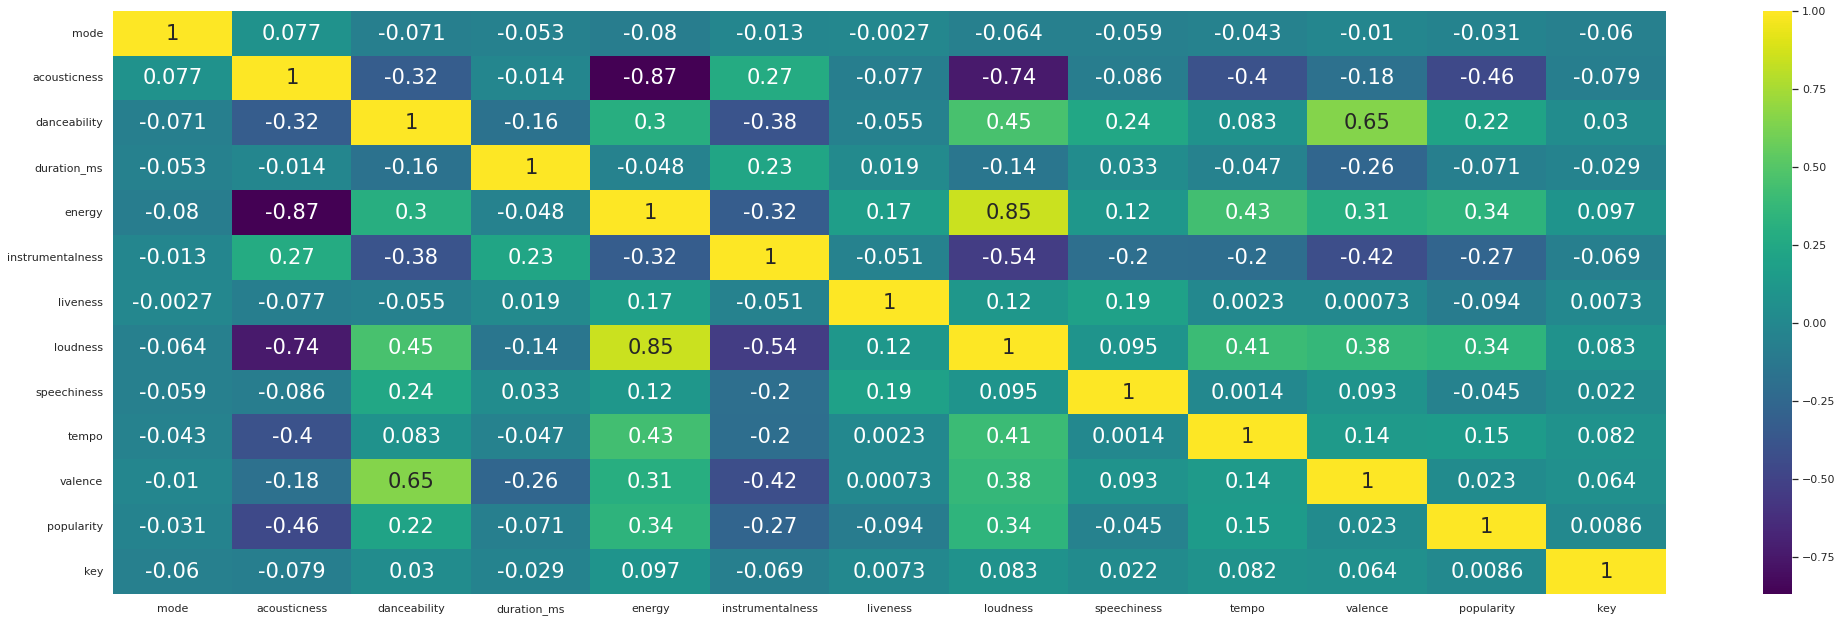

In [6]:
sns.set(rc={'figure.figsize':(31,10) })
correlation = df.corr()
sns.heatmap(correlation, cmap = 'viridis', annot = True, annot_kws={'size':21})

3. Which genre has the highest energy and which has the lowest?

Highest energy

(0.99, 1.0)

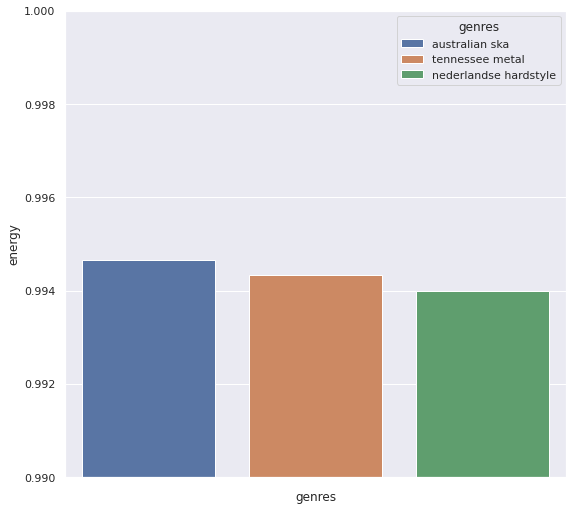

In [7]:
sns.set(rc={'figure.figsize':(8,8)})
g = df.groupby('genres', as_index=False)['energy'].sum().sort_values(by='energy', ascending=False).head(3)
x= sns.barplot(data=g, x='genres', y='energy', hue='genres', dodge=False).set(xticklabels=[]);
plt.ylim(.99,1)


Lowest Energy

[[]]

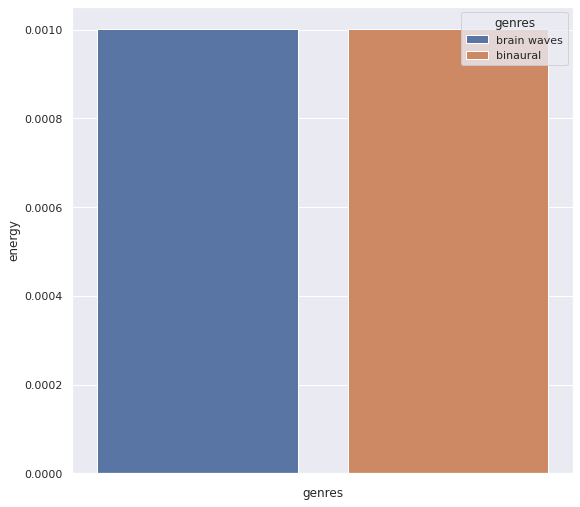

In [8]:
sns.set(rc={'figure.figsize':(8,8)})
g = df.groupby('genres', as_index=False)['energy'].sum().sort_values(by='energy', ascending=True).head(2)
sns.barplot(data=g, x='genres', y='energy', hue='genres', dodge=False, errwidth=0).set(xticklabels=[])
#plt.ylim(.00100,.00101)


 5) Plot the words frequency in genres. Which main genre categories have the most sub-genres? (mention
at least 3)


# **Clustering**

**Normaizing numerical columns**

In [9]:
# Make copy of data frame
df_2 = df.copy()

In [10]:

# Drop dependent variable 
df_2 = df_2.drop(['genres'], axis=1)
df_2.head()
#Normalization
numerical_columns = ['acousticness','danceability', 'duration_ms','energy',	'instrumentalness',	'liveness',	'loudness',	'speechiness','tempo','valence','popularity',	'key']


df_2[numerical_columns] = ( 
    
    df_2[numerical_columns] - df_2[numerical_columns].min()  
    
) /( 
    
    df_2[numerical_columns].max() - df_2[numerical_columns].min()
)


df_2.head()


,mode,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1,0.983266,0.121527,0.055005,0.070763,0.611727,0.361911,0.246166,0.018177,0.179536,0.102832,0.345041,0.545455
1,1,0.496766,0.277988,0.432864,0.452544,0.481615,0.116016,0.596180,0.057476,0.465697,0.223620,0.650826,0.454545
2,1,0.765060,0.751175,0.035818,0.822207,0.883065,0.110685,0.779396,0.025151,0.549467,0.994880,0.595041,0.636364
3,1,0.654032,0.541443,0.085870,0.420810,0.206965,0.209529,0.705170,0.091143,0.418406,0.522452,0.258594,0.636364
4,1,0.679274,0.552759,0.067903,0.317443,0.003028,0.160007,0.700623,0.064018,0.413650,0.455534,0.568017,0.636364


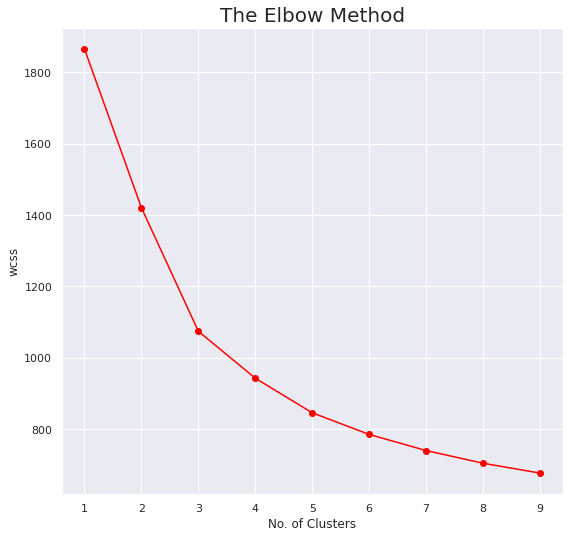

In [11]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 10):
    km = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit(df_2)
    wcss.append(km.inertia_)
    
plt.plot(range(1, 10), wcss, marker='o', color='red')
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()


# **Cluster interpretation**

Clustering n = 4 

In [12]:
km = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
km.fit(df_2)

# Get the cluster labels for the fitted data
labels = km.labels_
labels

array([0, 0, 2, ..., 2, 3, 2], dtype=int32)

In [13]:
# We'll assign the cluster labels to a new column called 'cluster' in our original dataframe
df['cluster'] = labels

# You can avoid pandas' output truncation by setting the four options below.
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

df.groupby('cluster').describe()

mode                                             acousticness  \
          count      mean      std  min  25%  50%  75%  max        count   
cluster                                                                    
0         700.0  0.964286  0.18571  0.0  1.0  1.0  1.0  1.0        700.0   
1         611.0  1.000000  0.00000  1.0  1.0  1.0  1.0  1.0        611.0   
2        1191.0  1.000000  0.00000  1.0  1.0  1.0  1.0  1.0       1191.0   
3         471.0  0.000000  0.00000  0.0  0.0  0.0  0.0  0.0        471.0   

                                                                              \
             mean       std       min       25%       50%       75%      max   
cluster                                                                        
0        0.835735  0.140650  0.080664  0.758932  0.879127  0.950458  0.99600   
1        0.228542  0.199970  0.000007  0.065406  0.178400  0.342115  0.87025   
2        0.269248  0.204000  0.000003  0.097180  0.234742  0.411801  0.88600   
3        0.313293  0.296675  0.000003  0.059348  0.206470  0.538000  0.99300   

        danceability                                                    \
               count      mean       std       min       25%       50%   
cluster                                                                  
0              700.0  0.422216  0.139215  0.056900  0.317621  0.423504   
1              611.0  0.575596  0.140812  0.144081  0.482124  0.585122   
2             1191.0  0.570117  0.120962  0.181000  0.493214  0.571000   
3              471.0  0.574963  0.161736  0.123000  0.465771  0.578910   

                         duration_ms                                         \
              75%    max       count           mean            std      min   
cluster                                                                       
0        0.525631  0.830       700.0  259793.963076  125906.211161  71019.0   
1        0.686058  0.897       611.0  253096.838838   67502.804943  45004.0   
2        0.657206  0.911      1191.0  242591.932365   54762.277048  30946.0   
3        0.697988  0.929       471.0  261021.585116  138480.000762  42813.0   

                                                                    energy  \
                   25%            50%            75%           max   count   
cluster                                                                      
0        190610.500000  233281.900744  305825.345245  1.622000e+06   700.0   
1        214465.994753  242422.228699  276639.467996  6.249330e+05   611.0   
2        211422.869048  236505.794572  267014.266865  5.998418e+05  1191.0   
3        206326.500000  240813.333333  290524.515863  2.382587e+06   471.0   

                                                                               \
             mean       std       min       25%       50%       75%       max   
cluster                                                                         
0        0.250601  0.130711  0.001002  0.153234  0.237500  0.339706  0.735000   
1        0.671929  0.153809  0.217000  0.572204  0.672167  0.780754  0.989000   
2        0.659875  0.149486  0.235000  0.553696  0.657417  0.761113  0.994333   
3        0.629291  0.214600  0.016100  0.487000  0.662000  0.804613  0.994667   

        instrumentalness                                               \
                   count      mean       std  min       25%       50%   
cluster                                                                 
0                  700.0  0.416864  0.308325  0.0  0.123809  0.412953   
1                  611.0  0.158479  0.233152  0.0  0.001540  0.037096   
2                 1191.0  0.125652  0.182434  0.0  0.004905  0.045173   
3                  471.0  0.191307  0.264855  0.0  0.000308  0.045807   

                            liveness                                        \
              75%       max    count      mean       std     min       25%   
cluster                                                      

In [14]:
df.groupby('cluster').describe(include='object')

genres                                    
         count unique                     top freq
cluster                                           
0          700    700  21st century classical    1
1          611    611        abstract hip hop    1
2         1191   1191                   8-bit    1
3          471    471               accordeon    1

In [15]:
df['cluster'] = labels

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

df.groupby('cluster').describe()
df.groupby('cluster').describe(include='object')

genres                                    
         count unique                     top freq
cluster                                           
0          700    700  21st century classical    1
1          611    611        abstract hip hop    1
2         1191   1191                   8-bit    1
3          471    471               accordeon    1

In [16]:
#sns.pairplot(df, hue='cluster', palette=sns.color_palette('hls', 4), corner=True)

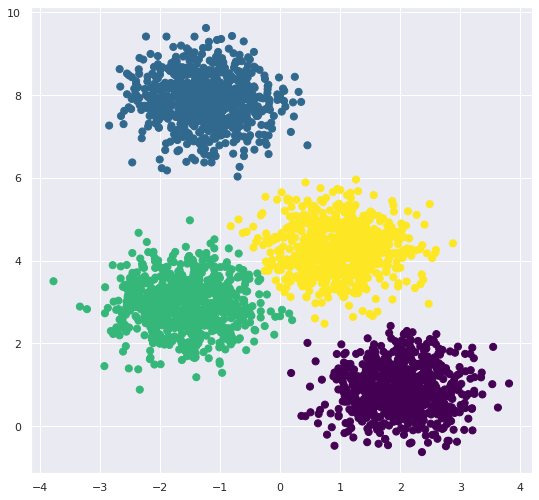

In [26]:
from sklearn.datasets import make_blobs

X, y_true = make_blobs(n_samples=2973, centers=4,
                       cluster_std=0.60, random_state=0)

labels = KMeans(4, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

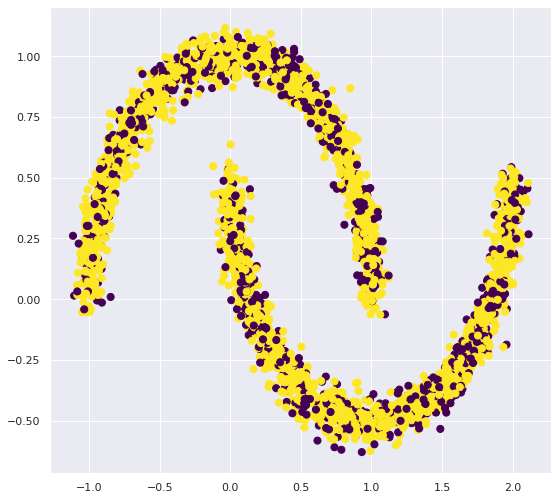

In [24]:
from sklearn.datasets import make_moons
X, y = make_moons(2973, noise=.05, random_state=0)

labels = KMeans(2, random_state=0).fit_predict(df_2)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

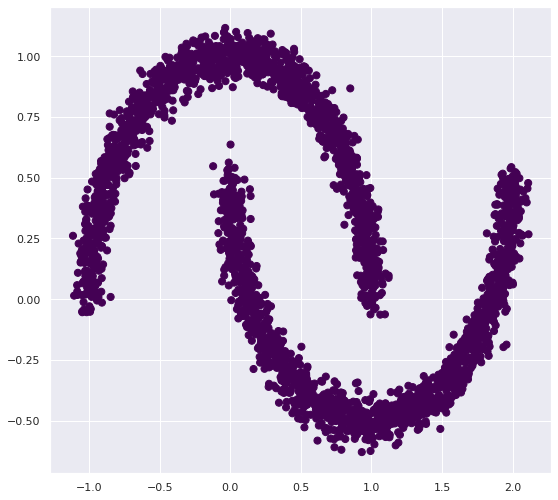

In [18]:
from sklearn.cluster import DBSCAN
X, y = make_moons(2973, noise=.05, random_state=0)

labels = DBSCAN(eps=0.3).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

# **Samples**

In [23]:
df.groupby('cluster').describe(include='object')

genres                                    
         count unique                     top freq
cluster                                           
0          700    700  21st century classical    1
1          611    611        abstract hip hop    1
2         1191   1191                   8-bit    1
3          471    471               accordeon    1

In [19]:
#Random sample of genres for 21st century classical
df['genres'][df['cluster']==0].sample(5)

265            belgian jazz
17            acoustic rock
2908             vocal jazz
1018                   fado
2821    ukrainian classical
Name: genres, dtype: object

In [20]:
#Random sample of genres for Abstract hip hop
df['genres'][df['cluster']==1].sample(5)

1707                   mandopop
1498      japanese experimental
1868    musica popular paraense
2716            thai indie rock
1384         indonesian hip hop
Name: genres, dtype: object

In [21]:
#Random sample of genres for 8-bit
df['genres'][df['cluster']==2].sample(5)

758                  danish metal
1866    musica popular colombiana
1204               gospel singers
976                       emocore
1703           manchester hip hop
Name: genres, dtype: object

In [22]:
#Random sample of genres for Accordeon
df['genres'][df['cluster']==3].sample(5)

1345            ilahiler
86          anadolu rock
872          disco house
2789           twoubadou
119     arkansas hip hop
Name: genres, dtype: object

# **Bonus**

In [28]:
 def genre_recommender(string)

df['genres'][df['cluster']==1].sample(5)

SyntaxError: ignored